<a href="https://colab.research.google.com/github/carolaine67892/Estat-stica---ENGD02/blob/main/Prova_de_Estat%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1ª Avaliação de Estatística 

Docente: Karla Esquerre

Discentes: Alicia Wyse Ferreira Ribeiro dos Santos e Carolaine Costa da Silva 

Desafio: Análise exploratória do dataset. 
Hipótese: Quais modelos apresentaram mais eficiência? 

Pacotes

In [ ]:
!pip install plotly

In [ ]:
#Pacotes
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from termcolor import colored as cl
from scipy import stats
from sklearn.model_selection import train_test_split
from scipy.optimize import fmin
from pylab import *
import statsmodels.api as sm
import copy
import scipy.stats
import math as math
import plotly.graph_objects as go

## Importação dos dados 

In [ ]:
# Carregando dados
## Link o github
link = 'https://github.com/carolaine67892/dataset/blob/d9ce40d8f44c5b460b4aafa0c66cb0e9f542ec16/C%C3%B3pia%20de%20equipe_8%20(1).csv?raw=True'
## carregando o dataset
dados= pd.read_csv(link)
dados.head()

,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
0,1,2016-01-28 14:00:00,13,NaN,491.267480,97.223010,39.902887,NaN,NaN,model1,15,NaN
1,2,2016-01-28 14:00:00,14,161.509950,409.676699,92.009398,32.213730,NaN,NaN,model3,1,NaN
2,3,2016-01-28 14:00:00,15,174.441093,384.106523,87.356816,42.210904,NaN,NaN,model3,14,NaN
3,4,2016-01-28 14:00:00,16,NaN,466.701022,110.222192,32.287121,NaN,NaN,model1,3,NaN
4,5,2016-01-28 14:00:00,17,NaN,458.626628,79.562550,42.242374,NaN,NaN,model1,14,NaN


## Seleção de variavéis e análise dos dados faltantes

Primeiro, vamos analisar a função com dropna que por sua vez, exclui todas as linhas que contenham dados faltantes. Analisa cada linha do dataset. 

In [ ]:
# Seleção de variáveis
## Informações gerais das variáveis
display(dados.info())
## Selecionando 
df = dados.loc[:,:] 
display(df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1031 entries, 0 to 1030
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     1031 non-null   int64  
 1   Tempo          1031 non-null   object 
 2   ID_maquina     1031 non-null   int64  
 3   volt           518 non-null    float64
 4   rotacao        1031 non-null   float64
 5   pressao        1031 non-null   float64
 6   vibracao       990 non-null    float64
 7   tipo_erro      55 non-null     object 
 8   falha          22 non-null     object 
 9   modelo         1031 non-null   object 
 10  idade_maquina  1031 non-null   int64  
 11  comp_subst     33 non-null     object 
dtypes: float64(4), int64(3), object(5)
memory usage: 96.8+ KB


None

,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
0,1,2016-01-28 14:00:00,13,NaN,491.267480,97.223010,39.902887,NaN,NaN,model1,15,NaN
1,2,2016-01-28 14:00:00,14,161.509950,409.676699,92.009398,32.213730,NaN,NaN,model3,1,NaN
2,3,2016-01-28 14:00:00,15,174.441093,384.106523,87.356816,42.210904,NaN,NaN,model3,14,NaN
3,4,2016-01-28 14:00:00,16,NaN,466.701022,110.222192,32.287121,NaN,NaN,model1,3,NaN
4,5,2016-01-28 14:00:00,17,NaN,458.626628,79.562550,42.242374,NaN,NaN,model1,14,NaN
5,6,2016-01-28 14:00:00,18,189.645766,479.252571,110.431083,47.119781,NaN,NaN,model3,15,NaN
6,7,2016-01-28 14:00:00,19,163.392062,434.338317,102.034418,43.606309,NaN,NaN,model3,17,NaN
7,8,2016-01-28 14:00:00,20,NaN,472.036538,108.531401,43.523689,NaN,NaN,model2,16,NaN
8,9,2016-01-28 15:00:00,10,NaN,430.910339,88.786961,39.000184,NaN,NaN,model3,10,NaN
9,10,2016-01-28 15:00:00,11,NaN,374.996912,130.416922,35.818911,NaN,NaN,model2,6,NaN


In [ ]:
dados2 = dados.dropna()


In [ ]:
dados2.head()

,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
437,438,2016-01-30 06:00:00,10,165.862882,373.895596,96.089284,42.051244,error2,comp4,model3,10,comp4
438,439,2016-01-30 06:00:00,11,176.756506,392.710530,86.076791,43.570977,error2,comp4,model2,6,comp4
439,440,2016-01-30 06:00:00,12,171.214840,438.471292,94.596269,45.157226,error2,comp4,model3,9,comp4
440,441,2016-01-30 06:00:00,13,181.753059,396.197198,94.378422,41.296116,error2,comp4,model1,15,comp4
443,444,2016-01-30 06:00:00,16,171.889734,454.102685,98.564833,31.657614,error2,comp4,model1,3,comp4


In [ ]:
dados2.shape
##tamanho do dataset sem os dados faltantes


(8, 12)

In [ ]:
dados.shape 
##tamanho do dataset com os dados faltantes

(1031, 12)

Observe acima que retirar os dados faltantes não uma opção, isto porque o dataset tem muitos detalhes e excluir dados faltantes desta forma poderia dificultar a análise e objetivo do projeto. Logo, é aconselhável preencher algumas linhas que contém os dados faltantes por meio das análises das variáveis. 

In [ ]:
enulo = dados.isnull()
enulo.head(1031)

##onde tem false, quer dizer que não tem dados faltantes e onde tem True, informa que tem dados faltantes. 

,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
0,False,False,False,True,False,False,False,True,True,False,False,True
1,False,False,False,False,False,False,False,True,True,False,False,True
2,False,False,False,False,False,False,False,True,True,False,False,True
3,False,False,False,True,False,False,False,True,True,False,False,True
4,False,False,False,True,False,False,False,True,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
1026,False,False,False,False,False,False,False,True,True,False,False,True
1027,False,False,False,False,False,False,False,True,True,False,False,True
1028,False,False,False,False,False,False,False,True,True,False,False,True
1029,False,False,False,False,False,False,False,True,True,False,False,True


In [ ]:
faltantes = dados.isnull().sum()
print (faltantes)



Unnamed: 0          0
Tempo               0
ID_maquina          0
volt              513
rotacao             0
pressao             0
vibracao           41
tipo_erro         976
falha            1009
modelo              0
idade_maquina       0
comp_subst        998
dtype: int64


In [ ]:
faltantes_percentual = (dados.isnull().sum() / len(dados['tipo_erro']))*100
print(faltantes_percentual)

Unnamed: 0        0.000000
Tempo             0.000000
ID_maquina        0.000000
volt             49.757517
rotacao           0.000000
pressao           0.000000
vibracao          3.976722
tipo_erro        94.665373
falha            97.866149
modelo            0.000000
idade_maquina     0.000000
comp_subst       96.799224
dtype: float64


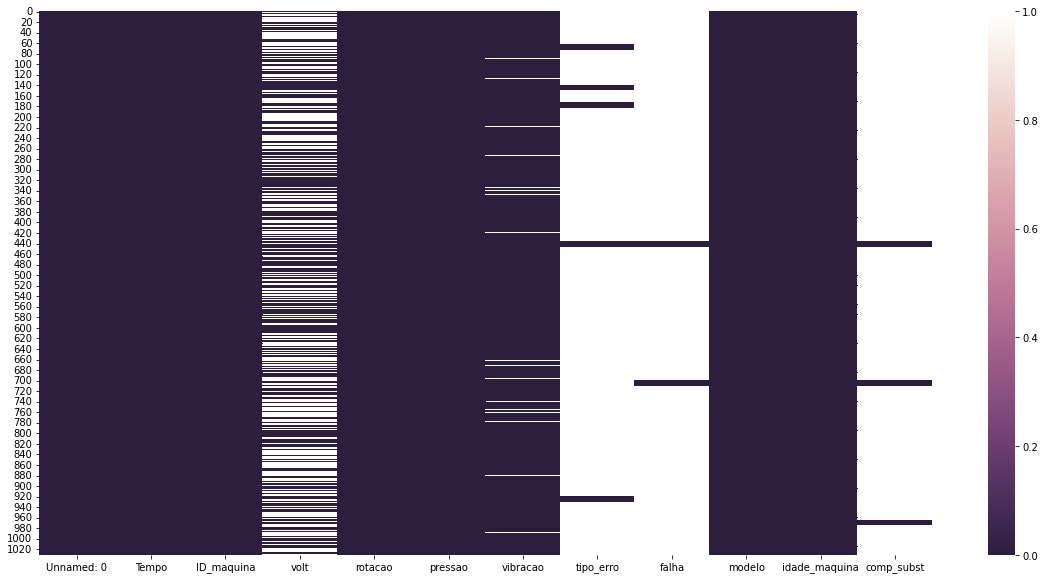

In [ ]:
#Visualizando os NaNs por meio do gráfico de calor
nan = df.columns[df.isnull().any()]
df[nan].isnull().sum()
plt.figure(figsize=(20, 10))

cmap = sns.cubehelix_palette(light=1, as_cmap=True, reverse=True)
sns.heatmap(df.isnull(), cmap=cmap)

####Substituição dos dados faltantes

Observe que foram colocados nomes diferentes para substituição dos NAN referentes à falha, tipo_erro e comp_subt, justamente para a visualização da análise ser mais analítica. A subistuição dos dados faltantes por 0 é para visualizar os valores faltantes de forma mais objetiva e assertiva. 

In [ ]:
dados['falha'].fillna('0',inplace = True)
dados ['tipo_erro'].fillna('0',inplace = True)
dados ['comp_subst'].fillna('0',inplace = True)


##para as colunas volt e vibracao, está sendo substituída os dados faltantes pelas médias. 
dados ['volt'].fillna(dados['volt'].mean(),inplace = True)
dados ['vibracao'].fillna(dados['vibracao'].mean(),inplace = True)
dados.head(1031)

,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
0,1,2016-01-28 14:00:00,13,170.545188,491.267480,97.223010,39.902887,0,0,model1,15,0
1,2,2016-01-28 14:00:00,14,161.509950,409.676699,92.009398,32.213730,0,0,model3,1,0
2,3,2016-01-28 14:00:00,15,174.441093,384.106523,87.356816,42.210904,0,0,model3,14,0
3,4,2016-01-28 14:00:00,16,170.545188,466.701022,110.222192,32.287121,0,0,model1,3,0
4,5,2016-01-28 14:00:00,17,170.545188,458.626628,79.562550,42.242374,0,0,model1,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1026,1027,2016-02-01 11:00:00,16,171.253823,506.847194,88.588432,36.626453,0,0,model1,3,0
1027,1028,2016-02-01 11:00:00,17,178.600131,389.841200,93.653820,37.283465,0,0,model1,14,0
1028,1029,2016-02-01 11:00:00,18,168.161286,585.522905,86.479760,43.261115,0,0,model3,15,0
1029,1030,2016-02-01 11:00:00,19,193.926712,496.218330,108.964841,41.315229,0,0,model3,17,0


## Filtração dos dados

In [ ]:
dados.loc[dados['modelo']=='model1']
##filtrar os dados da coluna de modelo 


,Unnamed: 0,Tempo,ID_maquina,volt,rotacao,pressao,vibracao,tipo_erro,falha,modelo,idade_maquina,comp_subst
0,1,2016-01-28 14:00:00,13,170.545188,491.267480,97.223010,39.902887,0,0,model1,15,0
3,4,2016-01-28 14:00:00,16,170.545188,466.701022,110.222192,32.287121,0,0,model1,3,0
4,5,2016-01-28 14:00:00,17,170.545188,458.626628,79.562550,42.242374,0,0,model1,14,0
11,12,2016-01-28 15:00:00,13,189.587439,497.599459,87.740272,40.809996,0,0,model1,15,0
14,15,2016-01-28 15:00:00,16,170.545188,468.516300,97.737999,43.641477,0,0,model1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1015,1016,2016-02-01 10:00:00,16,177.411170,506.508496,101.071412,48.978510,0,0,model1,3,0
1016,1017,2016-02-01 10:00:00,17,174.495629,427.250849,88.596349,34.655119,0,0,model1,14,0
1023,1024,2016-02-01 11:00:00,13,170.545188,390.283126,125.320362,42.574410,0,0,model1,15,0
1026,1027,2016-02-01 11:00:00,16,171.253823,506.847194,88.588432,36.626453,0,0,model1,3,0


In [ ]:
dados.loc[dados['modelo']=='model2']

In [ ]:
dados.loc[dados['modelo']=='model3']

## Análise Descritiva

In [ ]:
dados.describe()
#com a função describe é possível ter as informações de todas as colunas, quantidade, média, desvio padrão, máximo, mínimo e os quartis. 

##GERAL

In [ ]:
# Descritiva do modelo 1
print('Descritiva do modelo 1:')
display(dados.loc[dados['modelo'] == 'model1', :].describe())

In [ ]:
# Descritiva do modelo 2
print('Descritiva do modelo 2:')
display(dados.loc[dados['modelo'] == 'model2', :].describe())

In [ ]:
# Descritiva do modelo 1
print('Descritiva do modelo 3:')
display(dados.loc[dados['modelo'] == 'model3', :].describe())

Analisando estatísticas de posição de variabilidade dos dados referentes a um modelo

## Gráficos (testes)


barra




In [ ]:
plt.bar(dados.modelo, dados.tipo_erro)
plt.xticks(dados.modelo)

In [ ]:
plt.bar(dados.ID_maquina, dados.falha)
plt.xticks(dados.ID_maquina)

Pq não tá mostrando no 13, 16 e 17?

gráfico de linha 

In [ ]:
sns.lineplot(x=dados['ID_maquina'], y=dados['rotacao'])
plt.xticks(rotation=90)
plt.title('ID_maquina- Usando date no eixo x')

In [ ]:
sns.pairplot(dados[['rotacao', 'vibracao', 'volt', 'pressao']])
plt.show()

In [ ]:
import plotly.express as px
grafico = px.histogram(dados, x = 'rotacao', y = 'idade_maquina')
grafico.show()